<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
clients = [8, 4, 9, 6, 7, 1, 6, 8, 9, 10]
def CSI_sort(clients):
    new_list = sorted(clients)
    max_grade = []
    for elem in new_list:
        if elem not in max_grade:
            max_grade.append(elem)
    return max_grade[-3:]
CSI_sort(clients)

[8, 9, 10]

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Параметры общего стиля
#sns.set_style("whitegrid")
colors = sns.color_palette("pastel")
figsize = (6, 4)    # Для одного фрейма
figsize2 = (12, 4)  # Для двух фреймов
figsize3 = (16, 4)  # Для трёх фреймов

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [5]:
#hh_data = pd.read_csv('/content/dst-3.0_16_1_hh_database.csv', sep=';') # Адрес если датасет загружен в колаб
url = 'https://www.dropbox.com/s/z7oxqhlhg4xrjx5/dst-3.0_16_1_hh_database.csv?raw=true'
url_2 = 'https://www.dropbox.com/s/dbr6l3ik9p2wgyb/hh_database.csv?raw=true'                # файл от Жаровой для проверки
url_3 = 'https://github.com/nikolai-karpov/SF_DS/blob/main/homework/data/hh_database_preprocessed.csv?raw=true'   # файл для проверки от Жаровой, данные после обработки

hh_data = pd.read_csv(url, sep=';')
#data_for_check = pd.read_table(url_3, sep=',') # Переменная для сравнения на случай расхождения

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
display(hh_data.head())

Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   
2                               Кассир-операционист   
3                               Инженер-программист   
4                              Менеджер по продажам   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   
2  Среднее специальное образование 2002 Профессио...  16.04.2019 08:35   
3  Высшее образование 2002  Саратовский государст...  08.04.2019 14:23   
4  Высшее образование 2015 Кгу Психологии и педаг...  22.04.2019 10:32   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано  
2                      Не указано  
3                      Не указано  
4                      Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [6]:
hh_data.describe()

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 1987 Военный инженерный Кра...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
def get_education(arg):
    """[Функция преобразования признака Образование и ВУЗ]

    Args:
        args ([str]): [На вход получает содержание признака 'Образование и ВУЗ']

    Returns:
        [str]: [Возвращает категорию образования]
    """
    arg = ' '.join(arg.split(' ')[:3])
    if 'Высшее' in arg:
        return 'высшее'
    elif 'Неоконченное высшее' in arg:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in arg:
        return 'среднее специальное'
    elif 'Среднее образование' in arg:
        return 'среднее'

# Создаем признак "Образование"        
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(get_education)
hh_data = hh_data.drop('Образование и ВУЗ', axis=1)

# Выделяем категориальные признаки
hh_data['Образование'] = hh_data['Образование'].astype('category')


print(hh_data['Образование'].value_counts(dropna=False))

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
def get_gender(args):
    """[Фнкция преобразавания признака Пол]

    Args:
        args ([str]): [Пол, возраст, дату рождения]

    Returns:
        [str]: [2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина.]
    """
    if 'Мужчина ' in args:
        return 'М'
    if 'Женщина ' in args:
        return 'Ж'


def get_age(arg):
    """[Фнкция преобразавания признака ВОЗРАСТ]

    Args:
        args ([str]): [Пол, возраст]

    Returns:
        [str]: [Возраст]
    """
    arg_splitted = arg.split(' ')
    year_words=['год', 'года', 'лет']
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            return int(arg_splitted[index-1])

            
hh_data['Пол'] = hh_data['Пол, возраст'].apply(get_gender)

hh_data['Возраст'] = hh_data['Пол, возраст'].apply(get_age) 

# Преобразуем данные для оптимизации памяти
hh_data['Возраст'] = hh_data['Возраст'].astype(np.int64)  

print(f"Женских резюме {round(hh_data['Пол'].value_counts(normalize=True)['Ж'] * 100, 2)} %")
print('Средний возраст соискателей', round(hh_data['Возраст'].mean(), 1))

# Удаляем ненужный признак
hh_data = hh_data.drop('Пол, возраст', axis=1)

Женских резюме 19.07 %
Средний возраст соискателей 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
def get_experience(arg):
    """[Функция приведения отображения опыта работы к общему показателю в месяцах]

    Args:
        arg ([str]): [На вход получает значение признака 'Опыт работы']

    Returns:
        [int]: [Кол-во месяцев]
    """
    if arg is np.nan or arg == 'Не указано':
        return None                       # Возвращаем None чтоб не бло ошибок при построении графиков

    # Задаем ключевые слова для сравнения
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']

    arg_splitted = arg.split(' ')[:7]
    
    # Создаем счетчики
    years = 0
    months = 0

    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)


hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_experience)
hh_data = hh_data.drop('Опыт работы', axis=1)

# Чему равен медианный опыт работы (в месяцах) в нашей таблице?
print('Медианный опыт работы (в месяцах) равен', round(hh_data['Опыт работы (месяц)'].median()))


Медианный опыт работы (в месяцах) равен 100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [9]:
# Список городов-миллионников:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]


def get_citi(args):
    """[Функция определения категории города]

    Args:
        args ([str]): [Город, переезд, командировки]

    Returns:
        [str]: [Возвращает 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" и "другие" ]
    """
    city = args.split(' , ')[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'


hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_citi)

# Сколько процентов соискателей живут в Санкт-Петербурге?
urban_residents = hh_data.groupby('Город')['Город'].count().transform(lambda x: x / hh_data.shape[0] * 100)
print(round(urban_residents[1]), '% соискателей живут в Санкт-Петербурге')


def ready_to_move(args):
    """[Функция формирования данных для признака Готовность к переезду]

    Args:
        args ([str]): [Город, переезд, командировки]

    Returns:
        [bool]: [готов = True, не готов = False]
    """
    result = None
    if ('не готов к переезду' in args) or ('не готова к переезду' in args) or ('не хочу переезжать' in args):
        result = False  
    elif 'хочу' in args:
        return True
    else:
        result = True
    return result


hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(ready_to_move)

# Сколько процентов соискателей готовы к переездам?
percent_to_move = hh_data.groupby('Готовность к переезду')['Готовность к переезду'].count().transform(lambda x: x / hh_data.shape[0] * 100)
print(round(percent_to_move[1]), '% соискателей готовы к переездам')


def ready_business_trip(args):
    """[Функция определения данных для признака Готовность к командировкам]

    Args:
        args ([str]): [Город, переезд, командировки]

    Returns:
        [bool]: [готов = True, не готов = False]
    """
    list_variants = ['готов к командировкам', 'готова к командировкам', 'готов к редким командировкам', 'готова к редким командировкам']
    args_splited = args.split(',')
    result = None
    for i in range(len(args_splited)):                 # Перебираем переданные слова 
        if args_splited[i].strip() in list_variants:   # если слово совпадает с ключом
            result = True
        else:
            result = False
    return result


hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(ready_business_trip)
hh_data = hh_data.drop('Город, переезд, командировки', axis=1)

# Выделяем категориальные признаки
hh_data['Город'] = hh_data['Город'].astype('category')

# Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам?
percent_business_trip = round(hh_data[hh_data['Готовность к переезду'] & hh_data['Готовность к командировкам']].shape[0] / hh_data.shape[0] *100)
print(round(percent_business_trip), '% соискателей готовы одновременно и к переездам, и к командировкам')

11 % соискателей живут в Санкт-Петербурге
36 % соискателей готовы к переездам
32 % соискателей готовы одновременно и к переездам, и к командировкам


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
employments = ['полная занятость', 'частичная занятость',
              'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график', 
         'гибкий график', 'удаленная работа',
         'вахтовый метод']
         
for employment, chart in zip(employments, charts):
    hh_data[employment] = hh_data['Занятость'].apply(lambda x: employment in x)
    hh_data[chart] = hh_data['График'].apply(lambda x: chart in x)

# Удаляем ненужные столбцы
hh_data = hh_data.drop('Занятость', axis=1)
hh_data = hh_data.drop('График', axis=1)

# Сколько людей ищут проектную работу или волонтёрство (в обоих столбцах стоит True)?
print((hh_data[hh_data['проектная работа'] & hh_data['волонтерство']].shape[0]),'чел. ищут проектную работу или волонтёрство')

# Сколько людей хотят работать вахтовым методом или с гибким графиком (в обоих столбцах стоит True)?
print((hh_data[hh_data['вахтовый метод'] & hh_data['гибкий график']].shape[0]), 'чел. хотят работать вахтовым методом или с гибким графиком')

436 чел. ищут проектную работу или волонтёрство
2311 чел. хотят работать вахтовым методом или с гибким графиком


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [11]:
def get_salary(args):
    """Функция отсечения наименования валюты от суммы

    Args:
        args ([str]): [сумма и абревиатура валюты]

    Returns:
        [int]: [сумма зарплаты]
    """
    salary = float(args.split(' ')[0])
    return salary



def get_salary_currency(arg):
    """Функция приведения наименования валюты к стандарту ISO

    Args:
        args ([str]): [сумма и валюта в которой зарплата]

    Returns:
        [str]: [код валюты в стандарте ISO]
    """  
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]


# Формирование датасета с курсами валют
rates = pd.read_csv('https://www.dropbox.com/s/kik91sgee5jhiz6/ExchangeRates.csv?raw=true', sep=',')
# Преобразовываем в формат datetime
rates['date'] = pd.to_datetime(rates['date'], dayfirst=True).dt.date 

# Перевести признак «Обновление резюме» из таблицы с резюме в формат datetime и достать из него дату
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True).dt.date

# Создаем временный признак для зарплаты
hh_data['ЗП (tmp)'] = hh_data['ЗП'].apply(get_salary)

# Создаем временный признак и заполняем его наименованием валюты по ISO
hh_data['ISO (tmp)'] = hh_data['ЗП'].apply(get_salary_currency)

# Объединяем датасеты ориентируясь на дату и наименование валюты
merged = hh_data.merge(
    rates, 
    left_on=['ISO (tmp)', 'Обновление резюме'],
    right_on=['currency', 'date',], 
    how='left'
)

# Заполняем единицей ячейки столбца с курсом, там где есть пропуски данных
merged['close'] = merged['close'].fillna(1)

# Заполняем единицей ячейки столбца с пропорцией там где пропуски 
merged['proportion'] = merged['proportion'].fillna(1)

# Создаем признак зарплата в рублях
hh_data['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']

# Удаляем ненужные признаки
hh_data = hh_data.drop(['ЗП', 'ЗП (tmp)', 'ISO (tmp)'], axis=1)

# Отвечаем на вопрос в задании
# Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
print(f"Медианная заработная плата соискателей равна {round(hh_data['ЗП (руб)'].median()/1000)} руб")

Медианная заработная плата соискателей равна 59 руб


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

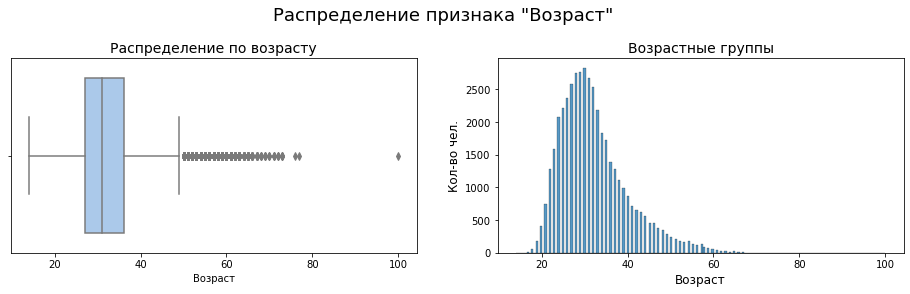

In [12]:
fig = plt.figure('Распределение признака "Возраст"', figsize=figsize3)
fig.subplots_adjust(top=0.8)
fig.suptitle('Распределение признака "Возраст"', fontsize=18)

axes = fig.subplots(1, 2)
ax = axes[0]
ax1 = axes[1]

sns.boxplot(
    ax=ax,
    data=hh_data,
    x='Возраст', 
    orient='h',                   # Горизонтальная расположение
    palette=[colors[0], colors[1]]
)
ax.set_title('Распределение по возрасту', fontsize=14)

# Гистограмма
ages_of_clients = hh_data.groupby('Возраст')['Возраст'].count() # Сортируем и считаем каждую группу по возрасту

sns.histplot(
    ax=ax1,
    data=hh_data,
    x="Возраст"          
)

ax1.set_title('Возрастные группы', fontsize=14)
ax1.set_xlabel('Возраст', fontsize=12)
ax1.set_ylabel('Кол-во чел.', fontsize=12)

plt.show()

Выводы по графику 
----
Мода распределения равна 30 годам.
Средний возраст соискателей 32 года

Предельные значения признака 14 и 100 лет.

Чуть больше половины соискателей находится в интервале примерно между 25 и 35 лет.   
86% соискателей в возрасте до 40 лет

На графике наблюдаются отклонения после 55 лет. В этой возрастной группе  1,42% соискателей.

Делать выводы о чистоте данных считаю преждевременным, так как не было иследования медианы опыта работы великовозрастных с соедней группой до 55 лет. 
Если среднее значение опыта будет превышает соседей, тогда это означает, что пенсионеры в поисках работы, но если же опыт ниже ближайших соседей из группы до 55 лет, тогда данные следует удалить воизбежания искажений в анализе


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

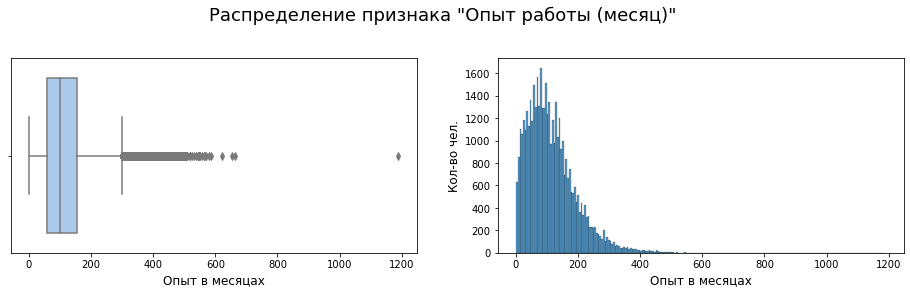

максимальный опыт работы равен 1188 мес.


In [13]:
fig = plt.figure('Распределение признака "Опыт работы (месяц)"', figsize=figsize3)
fig.subplots_adjust(top=0.8)
fig.suptitle('Распределение признака "Опыт работы (месяц)"', fontsize=18)

axes = fig.subplots(1, 2)
ax = axes[0]
ax1 = axes[1]

# Усы
sns.boxplot(
    ax=ax,
    data=hh_data,
    x='Опыт работы (месяц)', 
    orient='h',                   # Горизонтальная расположение
    palette=[colors[0], colors[1]]
)

ax.set_xlabel('Опыт в месяцах', fontsize=12)

# Гистограмма
expirience_of_clients = hh_data.groupby('Опыт работы (месяц)')['Опыт работы (месяц)'].count() # Сортируем и считаем каждую группу по возрасту

sns.histplot(
    ax=ax1,
    data=hh_data,
    x="Опыт работы (месяц)"          
)

#ax1.set_title('set_title', fontsize=14)
ax1.set_xlabel('Опыт в месяцах', fontsize=12)
ax1.set_ylabel('Кол-во чел.', fontsize=12)

plt.show()

# Чему равен максимальный опыт работы (в месяцах)?
print(f"максимальный опыт работы равен {round(hh_data['Опыт работы (месяц)'].max())} мес.")

Выводы
---
Мода распределения равна 81 мес.

Предельные значения признака 1 и 1188 мес.

Опыт работы большинства соискателей находится в интервале между 50 и 150 мес. (53%)
Среднее значение 114 мес.
 
Аномалия 1188 мес, но считаю, что прежде чем причислить их к грязным данным, нужно дополнительно исследовать возраст данной группы. Если ему 140, а он бодр и молод, тогда хвалим и всё равно удалить дабы не путал логику программы.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


/var/folders/vz/bqh72_8x44n4knzxnbdtwfc40000gp/T/ipykernel_23756/1017900041.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{x}млн." for x in ax.get_xticks()/1000000])
/var/folders/vz/bqh72_8x44n4knzxnbdtwfc40000gp/T/ipykernel_23756/1017900041.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels([f"{x}млн." for x in ax1.get_xticks()/1000000]) # округление по оси X


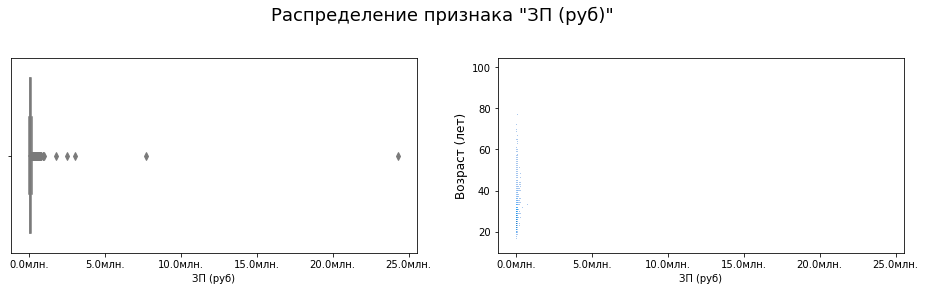

5  соискателей требуют заработную плату выше 1 миллиона рублей


In [14]:
fig = plt.figure('Распределение признака "ЗП (руб)"', figsize=figsize3)
fig.subplots_adjust(top=0.8)
fig.suptitle('Распределение признака "ЗП (руб)"', fontsize=18)

axes = fig.subplots(1, 2)
ax = axes[0]
ax1 = axes[1]

# Усы
sns.boxplot(
    ax=ax,
    data=hh_data,
    x='ЗП (руб)', 
    orient='h',                   # Горизонтальная расположение
    palette=[colors[0], colors[1]]
)

ax.set_xticklabels([f"{x}млн." for x in ax.get_xticks()/1000000])

# Гистограмма
salary_of_clients = hh_data.groupby(['ЗП (руб)', 'Возраст'])['ЗП (руб)'].count()# Сортируем и считаем каждую группу по возрасту

sns.histplot(
    ax=ax1,
    data=hh_data,
    y='Возраст',
    x="ЗП (руб)"          
)

ax1.set_ylabel('Возраст (лет)', fontsize=12)
ax1.set_xticklabels([f"{x}млн." for x in ax1.get_xticks()/1000000]) # округление по оси X

plt.show()


# Ответ на задание модуля
above_million = hh_data[hh_data['ЗП (руб)'] > 1000000].reset_index().count()
print(above_million[1],' соискателей требуют заработную плату выше 1 миллиона рублей')

Выводы
---
Предельные значения признака 1 руб. и 24'304'876 руб.

Минимальное значение можно объяснить тем, что возможно, соискатели закончили обучение и готовы пойти на практику без должного уровня оплаты. 
Либо в целях маркетингового хода укали оплату существенно ниже рынка в надежде, что их резюме будет выигрывать в показе по отношению к остальным.

Заработная плата большинства соискателей находится в интервале 50'000 - 60'000 руб

Пять человек желают зарплату выше 1 млн руб.

Есть аномалия для признака "возраст" 100 лет

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

<AxesSubplot:xlabel='Образование'>

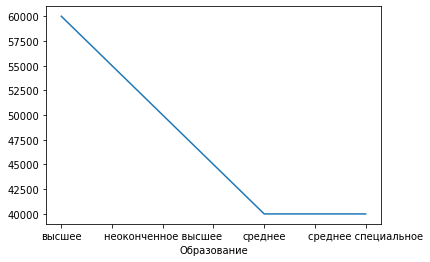

In [15]:
sorted_salary = hh_data[hh_data['ЗП (руб)'] < 1000000]
sorted_salary.groupby('Образование')['ЗП (руб)'].median().plot()

In [18]:
bar_data = hh_data[hh_data['ЗП (руб)']<1e6].groupby('Образование', as_index=False).median()
fig = px.bar(
    data_frame=bar_data,
    x='Образование',
    y='ЗП (руб)',
    title='Медианная з/п по уровню образования',
    color='Образование'
)
fig.show()

Выводы
---
Высшее образование по медианному показателю оплачивается выше всех остальных категорий.

Наименьшие уровни желаемой заработной платы наблюдаются в категории среднее и среднеспециальное.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [18]:
fig = px.box(
    sorted_salary,
    y='Город',
    x='ЗП (руб)',
    color='Город',
    title='Распределение желаемой заработной платы в зависимости от города',
    notched=True,
    points="all"
)
fig.show()

Выводы
---
Наибольший показатель желаемой заработной платы (~924 тысячи рублей) зафиксирован в категории городов "другие".

Медианные уровни желаемой заработной платы вышел в Москве и Санкт-Петербурге, и их размах в этих городах соответственно шире.

Считаете, что признак города при прогнозировании заработной платы важен.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [19]:
bar_data = hh_data.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная з/п по готовности к командировкам/переезду'
)
fig.show()

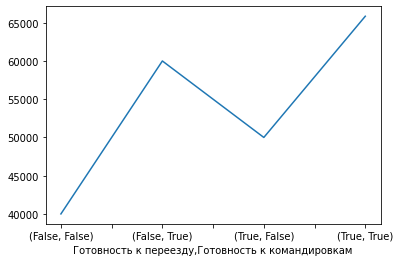

In [20]:
# Альтернативный график для Github
hh_data.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().plot()

Выводы
---
Медианная заработная плата соискателей, готовых и к переезду, и к командировкам равна 66 тыс.руб.

Наибольший уровень ожидаемой зарплаты демонстрирует категория "Готов к переезду и командировкам".

Наименьший уровень зарплаты наблюдается у категории "Не готов к переезду и командировкам".

Готовность соискателей к командировкам демонстрирует очевидные более высокие ожидания по зарплате.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [21]:
data_pivot_table = pd.pivot_table(hh_data,
                                  index='Образование',
                                  columns='Возраст',
                                  values='ЗП (руб)',
                                  aggfunc=np.median,
                                  fill_value=0)

# Тепловая карта  
fig = px.imshow(data_pivot_table, aspect='auto', title='Медианная з/п по образованию и возрасту')
fig.show()


Выводы
---
Для категории образования "высшее"наблюдается самый быстрый карьерный рост (то есть интенсивность роста заработной платы наибольшая).

Чем ниже уровень образования, тем меньше динамика роста уровня заработной платы.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [22]:
# Преобразовываем опыт месяцы в года
transformed_expirience = hh_data[['Возраст', 'Опыт работы (месяц)']]
transformed_expirience['Опыт работы (месяц)'] = transformed_expirience['Опыт работы (месяц)'].apply(lambda x: x/12)
transformed_expirience.rename(columns={'Опыт работы (месяц)': 'Опыт работы (лет)'}, inplace=True)                   # Приводим наименование столбца в соответствие содержанию

fig = px.scatter(
    transformed_expirience, 
    x='Возраст', 
    y='Опыт работы (лет)'
)

# построить прямую для выявления аномалии
fig.add_trace(go.Scatter(x=[0, 100], y=[0, 100],
                    mode='lines',
                    name='Возраст=Стаж'))

fig.show()

Выводы 
---
7 точек находятся на линии "опыт работы равен возрасту человека" либо выше её - это очевидные аномалии в данных.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [23]:
data_pivot_table = pd.pivot_table(hh_data,
                                  index='Образование',
                                  columns='Город',
                                  values='ЗП (руб)',
                                  aggfunc=np.median,
                                  fill_value=0)

# Тепловая карта  
fig = px.imshow(data_pivot_table, aspect='auto', title='Медианная з/п по образованию и Городу')
fig.show()

In [24]:
bar_data = hh_data.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['Возраст'].mean()

fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='Возраст',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Зависимость готовности  к переезду и командировкам от возраста'
)
fig.show()

In [25]:
fig = px.histogram(
    data_frame=hh_data,
    x='Возраст',
    y='Образование',
    histfunc='avg',
    color='Образование',
    title='Зависмость Образование и Возраст'
)
fig.show()

In [26]:
bar_data = hh_data.groupby(['Образование'],as_index=False)['Готовность к командировкам', 'Готовность к переезду'].count()

fig = px.histogram(
    bar_data, 
    x='Образование', 
    y=['Готовность к командировкам', 'Готовность к переезду'], 
    title='Зависмость уровня образования и готовности к командировкам и переезду',
    histnorm='probability density'
    )

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Выводы
---
В Москве соискатели с высшим образованием запрашивают более высокий уровень зарплаты по отношению к другим регионам.

В Москве и Санкт-Петербурге наблюдается закономерность, где соискатели со средним образованием ожидают тот же уровень зарплат, что и со среднеспециальным.

В городах миллиониках показатели тождествены другим регионам страны.

Наблюдается существенное различие в размере ожидаемой зарплаты между группой Москва-Питер и другие города включая миллионники.

Средний возраст готовых к переезду и командировкам 30-33 года, что в свою очердь совпадает со средним возрастом соискателей с высшим и средним образованием.

Среди соискателей готовых к переезду и командировкам значительно больше тех кто с высшим образованием.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [27]:
# Определяем дубликаты
duplicates = hh_data[hh_data.duplicated(subset=hh_data.columns)]
print('Число дубликтов: {}'.format(duplicates.shape[0]))

hh_data = hh_data.drop_duplicates()
print('В результате осталось после очистки записей: {}'.format(hh_data.shape[0]))

Число дубликтов: 161
В результате осталось после очистки записей: 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [28]:
# Определяем долю пропусков 
cols_nan_percent = hh_data.isna().sum()
cols_with_nan = cols_nan_percent[cols_nan_percent > 0].sort_values(ascending=False)

# и выводим результат 
cols_with_nan

# Альтернативный вариант
#hh_data[hh_data['Опыт работы (месяц)'].isna() == True].reset_index()
#null_data = hh_data.isnull().sum()
#display(null_data[null_data > 0])

Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [29]:
# Создаю копию данных
hh_data_copy = hh_data.copy()

# Удаляю строчки с NaN из столбцов "Последнее/нынешнее место работы" и "Последняя/нынешняя должность"
hh_data = hh_data[~((hh_data['Последнее/нынешнее место работы'].isna()) | 
                  (hh_data['Последняя/нынешняя должность'].isna())
                  )]



# Заменяю данных на очищенные
#hh_data = hh_data_copy.copy()

# Альтернативный способ
# Удаляю строчки с NaN
hh_data = hh_data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
print(f'Найдено {hh_data["Опыт работы (месяц)"].isna().sum()} NAN значений')

# Заполняю NaN медианными значениям
hh_data = hh_data.fillna(
    value={'Опыт работы (месяц)': hh_data['Опыт работы (месяц)'].median()}
    )

hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы (месяц)'].fillna(
    hh_data['Опыт работы (месяц)'].median()
    )

# Альтернативный вариант заполнения NaN медианными значениями
#hh_data_copy = hh_data_copy.fillna(value={'Опыт работы (месяц)': hh_data_copy['Опыт работы (месяц)'].median()})
#hh_data_copy['Опыт работы (месяц)'] = hh_data_copy['Опыт работы (месяц)'].fillna(hh_data_copy['Опыт работы (месяц)'].median())

print(f'Осталось {hh_data_copy["Опыт работы (месяц)"].isna().sum()} NAN значений.')
print('Результирующее среднее значение Опыт работы (месяц)', round(hh_data_copy['Опыт работы (месяц)'].mean(),0))

Найдено 168 NAN значений
Осталось 168 NAN значений.
Результирующее среднее значение Опыт работы (месяц) 114.0


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [30]:
# Сколько выбросов
# Сортировка соискателей ищущих заработную плату выше 1 миллиона рублей.
above_million = hh_data[hh_data['ЗП (руб)'] > 1000000].reset_index().count()
print(f'Зарплата свыше 1 млн руб. заявлена у {above_million[1]} чел.')

# Cколько соискателей указали желаемую зарплату ниже 1 тыс.рублей.
below_thousand = hh_data[hh_data['ЗП (руб)'] < 1000].reset_index().count()
print(f'Зарплата ниже 1 тыс.руб. заявлена у {below_thousand[1]} чел.')

# Удалите резюме, в которых указана заработная плата либо выше 1 млн
#hh_data = hh_data[~(hh_data['ЗП (руб)'] > 1000000)]

# Удалите резюме, в которых указана заработная плата ниже 1 тыс. рублей
#hh_data = hh_data[~(hh_data['ЗП (руб)'] < 1000)]

# Альтернативное решение
outliers = hh_data[(hh_data['ЗП (руб)'] > 1e6) | (hh_data['ЗП (руб)'] < 1e3)]
hh_data = hh_data.drop(outliers.index)
print('Удалено: ', outliers.shape[0])

Зарплата свыше 1 млн руб. заявлена у 5 чел.
Зарплата ниже 1 тыс.руб. заявлена у 84 чел.
Удалено:  89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [31]:
# Cколько соискателей имеют опыт превышающий их возраст
experience_exceeds_age = hh_data[(hh_data['Опыт работы (месяц)']/12) >= hh_data['Возраст']].reset_index().count()
print(f'Опыт превышает возраст у {experience_exceeds_age[1]} чел.')

# Удаление резюме, в которых опыт превышает возраст
outliers = hh_data[hh_data['Опыт работы (месяц)']/12 >= hh_data['Возраст']]
hh_data = hh_data.drop(outliers.index)
print('Удалено: ', outliers.shape[0])     

# Альтернативный вариант
#hh_data = hh_data[~((hh_data['Опыт работы (месяц)']/12) >= hh_data['Возраст'])]

Опыт превышает возраст у 7 чел.
Удалено:  7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

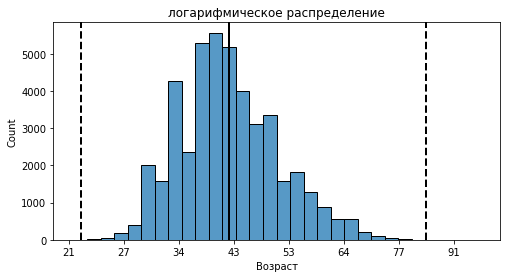

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


In [32]:
# Построение графика распределение признака в логарифмическом масштабе
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(hh_data['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+4*log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()-3*log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('логарифмическое распределение');

ax.set_xticklabels([round(x) for x in ax.get_xticks()**3])

plt.show()

# Поиск выбросов с помощью метода z-отклонения
def outliers_z_score(data, feature, left=3, right=3, log_scale=False):
    """Функция поиска выбросов с помощью метода z-отклонения 

    Args:
        data (DataFrame): Датасет в котором будут анализироваться выбросы
        feature (str): Данные признака по которому анализируются выбросы
        left (int, optional): Колличество сигм левой границы интервала. Defaults to 3.
        right (int, optional): Колличество сигм правой границы интервала. Defaults to 3.
        log_scale (bool, optional): Если True тогда в расчете мю и сигмы используется np.log. Defaults to False.

    Returns:
        DataFrame:  outliers - Число выбросов по методу z-отклонения
                    cleaned - очищенный датасет
    """
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    
    mu = x.mean()
    sigma = x.std()

    lower_bound = mu - (left * sigma)
    upper_bound = mu + (right * sigma)

    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]

    return outliers, cleaned

# Применение функции и вывод результатов
outliers, cleaned = outliers_z_score(hh_data, 'Возраст', left=3,  right=4, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Комментарии
---
Логарифмическое распределение асимметрично в правую сторону.

Моя оценка:

Соискатели моложе 22 лет и старше 84 лет попадают под категорию выбросов